#                                                          Unidad 1

# Proyecto: Minería de Datos para la Automatización del Monitoreo de Infraestructura TI: Un Enfoque Predictivo con Zabbix 

## Metodología: CRISP-DM 
En este proyecto vamos aplicar la metodología CRISP-DM (Cross Industry Standard Process for Data Mining), la cual establece un proceso estructurado para el desarrollo de proyectos de minería de datos. El flujo que se seguirá en esta primera etapa comprende las fases:

 → Business Understanding → Data Understanding → Data Preparation  → Modelado (Modeling)

##  **Integrantes:**   

- Ruben Mark Salazar Tocas
- Elias Uziel Sauñe Fernadez
  
## Fecha del informe: [30/08/2025]

## Fase 1 – Business Understanding (Comprensión del Negocio)

### 1.1. Problema de negocio

La Universidad Peruana Unión (UPeU), una institución educativa de gran envergadura con tres sedes principales en Lima, Juliaca y Tarapoto, la infraestructura tecnológica juega un rol esencial para garantizar la continuidad de sus servicios académicos y administrativos. Nuestra universidad depende de servidores, plataformas virtuales, sistemas de gestión académica, bibliotecas digitales y entornos que son críticos para el correcto desarrollo de sus actividades.

Uno de los principales riesgos tecnológicos que enfrentan organizaciones de este tipo es la saturación de recursos de hardware, especialmente en el consumo de CPU y memoria RAM de los servidores. Estos picos de uso pueden deberse a:

- Altas cargas académicas en temporadas de matrícula o evaluaciones.

- Procesos administrativos intensivos como la generación de pagos.

Cuando el consumo de recursos llega a niveles críticos sin previo aviso, los sistemas experimentan lentitud, interrupciones o caídas inesperadas. Esto no solo podría afectar a estudiantes y docentes, sino también la imagen institucional de la UPeU, ya que limita su capacidad de garantizar continuidad de servicio tecnológico, lo cual es indispensable en un entorno educativo competitivo y digitalizado.

Actualmente, herramientas como Zabbix ya permiten a los equipos de TI monitorear en tiempo real la infraestructura, generando alertas cuando el consumo excede ciertos umbrales. Sin embargo, este enfoque puede ser reactivo porqué la alerta aparece cuando el problema ya está ocurriendo, y muchas no podemos prevenir la caída.

### 1.2. Objetivo general

El objetivo que tenemos como grupo es construir un modelo predictivo basado en LSTM integrado con Zabbix, capaz de anticipar el uso de CPU y memoria RAM, reduciendo el riesgo de saturación y mejorando la administración preventiva de recursos tecnológicos.

### 1.3. Criterios de éxito



Técnico:
- Alcanzar métricas de predicción satisfactorias (RMSE bajo, MAPE ≤ 10%) en CPU y RAM.

- Demostrar que el modelo LSTM supera a enfoques lineales como ARIMA en la gestión de ruido y picos atípicos.

De negocio:

- Que Zabbix reciba predicciones con al menos 15–30 minutos de anticipación antes de que se produzca una saturación real.

- Disminuir el número de falsos positivos en alertas respecto a métodos tradicionales.

Social/Operativo:

- Contribuir a la continuidad del servicio TI, reduciendo caídas imprevistas y tiempos de inactividad.

- Optimizar el uso de recursos humanos y económicos mediante la prevención en lugar de la reacción.

## Fase 2. Data Understanding (Comprensión de los datos)

### 📥 2. Data collection (Recopilación de datos )

In [1]:
import pandas as pd
import numpy as np

# ==============================
# Paso 1: Cargar el dataset
# ==============================
df = pd.read_excel("../V2/DATA.xlsx")

In [2]:
# ==============================
# Paso 2: Resumen general
# ==============================
print("=== Información general del DataFrame ===")
print(df.info())  # estructura, tipos de datos y nulos

print("\n=== Nombres de columnas ===")
print(df.columns)

print("\n=== Forma (filas, columnas) ===")
print(df.shape)

print("\n=== Primeras 10 filas ===")
print(df.head(10))

=== Información general del DataFrame ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4320 entries, 0 to 4319
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   cpu_usage    4320 non-null   float64
 1   used_memory  4320 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 67.6 KB
None

=== Nombres de columnas ===
Index(['cpu_usage', 'used_memory'], dtype='object')

=== Forma (filas, columnas) ===
(4320, 2)

=== Primeras 10 filas ===
   cpu_usage  used_memory
0   0.012267    275972096
1   0.016353    275972096
2   0.020475    276099072
3   0.016341    275484672
4   0.024561    275484672
5   0.028638    276373504
6   0.028652    276234240
7   0.028602    275582976
8   0.024470    275582976
9   0.032654    275582976


### 📊 3. Descriptive analysis (Análisis descriptivo)

#### 3.1 Análisis descriptivo

In [3]:
# ==============================
# Paso 3: Resumen estadístico
# ==============================

print("=== Resumen estadístico de todas las variables ===")
display(df.describe(include="all").T)  # incluye variables numéricas y categóricas


=== Resumen estadístico de todas las variables ===


,count,mean,std,min,25%,50%,75%,max
cpu_usage,4320.0,3.535447e+01,2.620570e+01,4.054000e-03,1.232400e-02,5.216912e+01,5.554078e+01,7.511262e+01
used_memory,4320.0,9.495881e+08,4.830037e+08,2.750956e+08,6.754540e+08,8.958239e+08,1.213200e+09,3.626500e+09


In [4]:
# ==============================
# Paso 4: Separación por tipo de variables
# ==============================

numeric_data = df.select_dtypes(include=[np.number])# Seleccionar variables numéricas

categor_data = df.select_dtypes(exclude=[np.number])# Seleccionar variables categóricas 

print(f"Hay {numeric_data.shape[1]} columnas numéricas y {categor_data.shape[1]} columnas categóricas en el dataset.")


Hay 2 columnas numéricas y 0 columnas categóricas en el dataset.


In [5]:
numeric_data.describe().T
# Puedes ver la Distribución de variables numéricas (cantidad o freq, media, mediana, desviación estándar, mín, máx. etc.).

,count,mean,std,min,25%,50%,75%,max
cpu_usage,4320.0,3.535447e+01,2.620570e+01,4.054000e-03,1.232400e-02,5.216912e+01,5.554078e+01,7.511262e+01
used_memory,4320.0,9.495881e+08,4.830037e+08,2.750956e+08,6.754540e+08,8.958239e+08,1.213200e+09,3.626500e+09


In [6]:
# No hay variables categóricas en este dataset.

# categor_data.describe(include="all").T
# Puedes ver valores únicos en categóricas (ej. State, Vehicle type, Fuel type), freq, etc.

In [7]:
# Conteo de valores únicos en categóricas
# for col in ['Intervention type','Vehicle type','Fuel type','State']:
#   print(f"\n{col}:\n", df[col].value_counts())

# Conteo de la variable objetivo, 
# df["State"].value_counts()

#### 3.2 Análisis descriptivo (gráficos)


estos gráficos tienen sentido porque muestran claramente los patrones normales de carga y las anomalías simuladas. Son útiles para justificar la necesidad de un modelo predictivo (como LSTM) que anticipe picos en CPU y RAM.



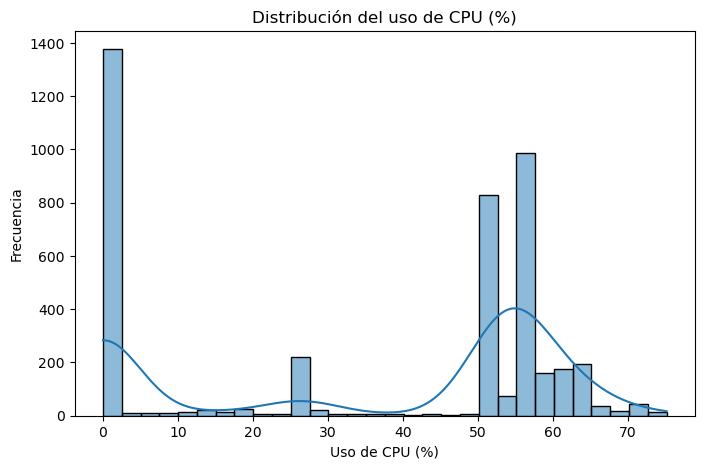


Muestra que el CPU tiene dos patrones dominantes: valores muy bajos (casi inactivos) y concentraciones entre 50% y 60%. Esto refleja que el sistema pasa por periodos de reposo y otros de carga media/alta.



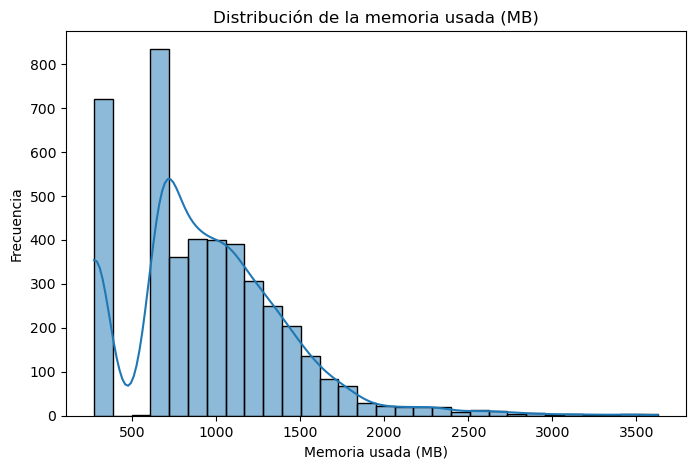


La memoria se distribuye de forma sesgada a la derecha: la mayoría de observaciones están entre 500 y 1500 MB, pero existen valores extremos que llegan hasta 3500 MB, representando momentos de alta demanda.



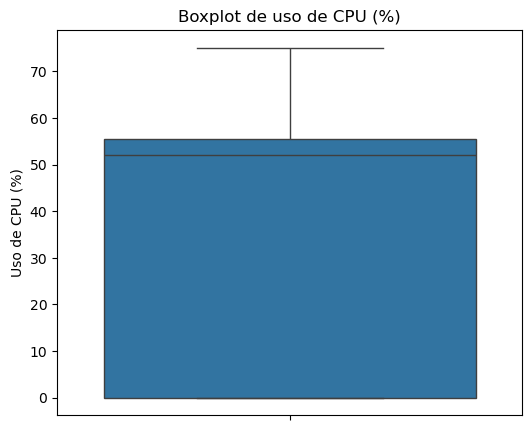


Confirma la concentración del uso de CPU entre 50% y 60%. La ausencia de outliers marcados sugiere que los picos de CPU se mantienen relativamente controlados dentro de ese rango.



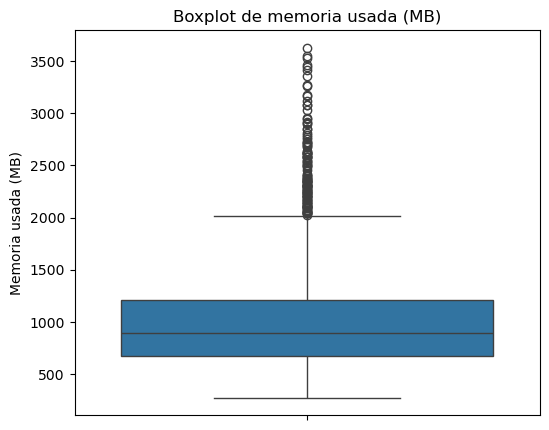


Evidencia que la memoria presenta múltiples outliers por encima de 2000 MB, lo cual indica picos atípicos y posibles riesgos de saturación si no se gestionan.



In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

print("")
print("estos gráficos tienen sentido porque muestran claramente los patrones normales de carga y las anomalías simuladas. Son útiles para justificar la necesidad de un modelo predictivo (como LSTM) que anticipe picos en CPU y RAM.")
print("")

# ==============================
# Histograma de uso de CPU
# ==============================
plt.figure(figsize=(8,5))
sns.histplot(df['cpu_usage'], bins=30, kde=True)
plt.title("Distribución del uso de CPU (%)")
plt.xlabel("Uso de CPU (%)")
plt.ylabel("Frecuencia")
plt.show()
print("")
print("Muestra que el CPU tiene dos patrones dominantes: valores muy bajos (casi inactivos) y concentraciones entre 50% y 60%. Esto refleja que el sistema pasa por periodos de reposo y otros de carga media/alta.")
print("")

# ==============================
# Histograma de memoria usada
# ==============================
plt.figure(figsize=(8,5))
sns.histplot(df['used_memory']/1e6, bins=30, kde=True)  # convertir a MB
plt.title("Distribución de la memoria usada (MB)")
plt.xlabel("Memoria usada (MB)")
plt.ylabel("Frecuencia")
plt.show()
print("")
print("La memoria se distribuye de forma sesgada a la derecha: la mayoría de observaciones están entre 500 y 1500 MB, pero existen valores extremos que llegan hasta 3500 MB, representando momentos de alta demanda.")
print("")

# ==============================
# Boxplot de CPU
# ==============================
plt.figure(figsize=(6,5))
sns.boxplot(y=df['cpu_usage'])
plt.title("Boxplot de uso de CPU (%)")
plt.ylabel("Uso de CPU (%)")
plt.show()
print("")
print("Confirma la concentración del uso de CPU entre 50% y 60%. La ausencia de outliers marcados sugiere que los picos de CPU se mantienen relativamente controlados dentro de ese rango.")
print("")
# ==============================
# Boxplot de memoria
# ==============================
plt.figure(figsize=(6,5))
sns.boxplot(y=df['used_memory']/1e6)
plt.title("Boxplot de memoria usada (MB)")
plt.ylabel("Memoria usada (MB)")
plt.show()

print("")
print("Evidencia que la memoria presenta múltiples outliers por encima de 2000 MB, lo cual indica picos atípicos y posibles riesgos de saturación si no se gestionan.")
print("")


#### 3.3 Análisis exploratorio (con estadísticas): Correlaciones y cruces de variables

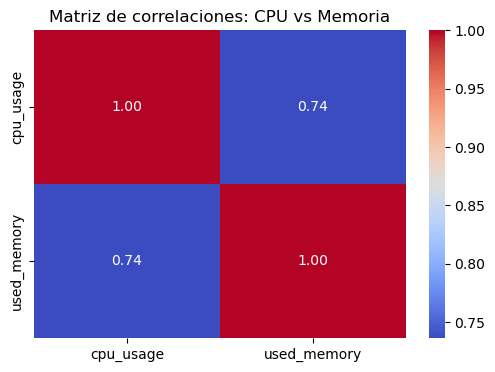

In [9]:
# ==============================
# 3.3 Análisis exploratorio (con estadísticas)
# ==============================


# Correlaciones numéricas
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlaciones: CPU vs Memoria")
plt.show()

# Nota: No hay variables categóricas en este dataset simulado,
# Cruce de variables categóricas con el objetivo
#pd.crosstab(df['Fuel type'], df['State'], normalize='index') * 100


#### 3.4 Diagnóstico de calidad inicial 

In [10]:

# 1. Valores faltantes
print("Valores faltantes por columna:")
print(df.isnull().sum())

# 2. Registros duplicados
duplicados = df.duplicated().sum()
print("\nRegistros duplicados:", duplicados)

# 3. Posibles inconsistencias en CPU y memoria
print("\nRango de uso de CPU (%):", df['cpu_usage'].min(), "-", df['cpu_usage'].max())
print("Rango de memoria usada (bytes):", df['used_memory'].min(), "-", df['used_memory'].max())

suspects = df[(df['cpu_usage'] < 0) | (df['cpu_usage'] > 100) | (df['used_memory'] < 0)]
print("\nRegistros sospechosos (CPU fuera de 0–100% o RAM negativa):", len(suspects))

if not suspects.empty:
    display(suspects.head())


Valores faltantes por columna:
cpu_usage      0
used_memory    0
dtype: int64

Registros duplicados: 121

Rango de uso de CPU (%): 0.004054 - 75.112623
Rango de memoria usada (bytes): 275095552 - 3626500096

Registros sospechosos (CPU fuera de 0–100% o RAM negativa): 0


In [11]:
import numpy as np
import pandas as pd
from pathlib import Path

# Carpeta de salida (puedes cambiarla)
outdir = Path("./salidas_calidad")
outdir.mkdir(parents=True, exist_ok=True)

# Guardar una copia limpia de referencia
df_clean = df.copy()
df_clean.to_csv(outdir / "df_clean.csv", index=False)

def contaminar(df, frac_nans=0.01, n_outliers=12, n_neg_ram=8, dup_frac=0.02, seed=2025):
    """
    Ensucia el dataset:
      - Inserta NaNs en ambas columnas (~ frac_nans)
      - Inyecta outliers de CPU > 100 (n_outliers)
      - Inyecta RAM negativa (n_neg_ram)
      - Duplica ~ dup_frac del total de filas
    """
    rng = np.random.default_rng(seed)
    df_noisy = df.copy()
    n = len(df_noisy)

    # 1) NaN aleatorios
    k = max(1, int(frac_nans * n))
    idx_nan_cpu = rng.choice(n, size=k, replace=False)
    idx_nan_ram = rng.choice(n, size=k, replace=False)
    df_noisy.loc[idx_nan_cpu, 'cpu_usage'] = np.nan
    df_noisy.loc[idx_nan_ram, 'used_memory'] = np.nan

    # 2) Outliers: CPU > 100
    m = min(n_outliers, n)
    idx_out_cpu = rng.choice(n, size=m, replace=False)
    df_noisy.loc[idx_out_cpu, 'cpu_usage'] = rng.uniform(110, 200, size=m)

    # 3) RAM negativa
    r = min(n_neg_ram, n)
    idx_neg_ram = rng.choice(n, size=r, replace=False)
    df_noisy.loc[idx_neg_ram, 'used_memory'] = -rng.integers(1_000, 10_000, size=r)

    # 4) Duplicados (~ dup_frac)
    d = max(1, int(dup_frac * n))
    dup_rows = df_noisy.sample(d, random_state=seed)
    df_noisy = pd.concat([df_noisy, dup_rows], ignore_index=True)

    return df_noisy

# Generar data ensuciada
df_dirty = contaminar(df_clean,
                      frac_nans=0.01,
                      n_outliers=12,
                      n_neg_ram=8,
                      dup_frac=0.02,
                      seed=2025)

# Guardar dataset sucio
df_dirty.to_csv(outdir / "df_dirty.csv", index=False)

# Limpieza rápida de ejemplo (para comparar)
df_fix = (
    df_dirty
    .drop_duplicates()
    .query("used_memory >= 0")
    .copy()
)
# Reglas de negocio: CPU 0–100; imputación mediana
df_fix = df_fix[df_fix['cpu_usage'].between(0, 100, inclusive='both')]
df_fix['cpu_usage'] = df_fix['cpu_usage'].fillna(df_fix['cpu_usage'].median())
df_fix['used_memory'] = df_fix['used_memory'].fillna(df_fix['used_memory'].median())

# Guardar dataset “arreglado”
df_fix.to_csv(outdir / "df_fix.csv", index=False)

# Resumen rápido
print("Archivos guardados en:", outdir.resolve())
for name, d in [("LIMPIO", df_clean), ("SUCIO", df_dirty), ("LIMPIEZA_RÁPIDA", df_fix)]:
    print(f"\n=== {name} ===")
    print("shape:", d.shape)
    print("faltantes:\n", d.isna().sum())
    print("duplicados:", d.duplicated().sum())
    print("CPU min-max:", np.nanmin(d['cpu_usage']), "-", np.nanmax(d['cpu_usage']))
    print("RAM  min-max:", np.nanmin(d['used_memory']), "-", np.nanmax(d['used_memory']))


Archivos guardados en: /opt/notebooks/Mineria de datos/PY MINERIA DE DATOS/V3/salidas_calidad

=== LIMPIO ===
shape: (4320, 2)
faltantes:
 cpu_usage      0
used_memory    0
dtype: int64
duplicados: 121
CPU min-max: 0.004054 - 75.112623
RAM  min-max: 275095552 - 3626500096

=== SUCIO ===
shape: (4406, 2)
faltantes:
 cpu_usage      44
used_memory    45
dtype: int64
duplicados: 203
CPU min-max: 0.004054 - 188.76999400091012
RAM  min-max: -7117.0 - 3626500096.0

=== LIMPIEZA_RÁPIDA ===
shape: (4099, 2)
faltantes:
 cpu_usage      0
used_memory    0
dtype: int64
duplicados: 0
CPU min-max: 0.004054 - 75.112623
RAM  min-max: 275173376.0 - 3626500096.0


#### 3.5 Perfil estadístico comparativo 

In [12]:
# En tu caso, en la fase 3.5 no se puede hacer un perfil comparativo entre clases, porque solo tienes series numéricas continuas 
# (cpu_usage, used_memory).

# Medias comparativas numéricas
#df.groupby('State').mean(numeric_only=True)

In [13]:
# Comparación gráfica de variables numéricas
#plt.figure(figsize=(8,5))
#sns.histplot(data=df, x='Vehicle age', hue='State', kde=True, bins=30)
#plt.title("Edad del vehículo según estado")
#plt.show()

In [14]:
#perfil_num = df.groupby('State')[['Vehicle age','CO percVol','HC ppm','CO2 percVol']]
#perfil_num = perfil_num.agg(['mean','median','std','min','max']).round(3)
#display(perfil_num)

#perfil_cat_fuel = pd.crosstab(df['Fuel type'], df['State'], normalize='columns')*100
#perfil_cat_type = pd.crosstab(df['Vehicle type'], df['State'], normalize='columns')*100
#display(perfil_cat_fuel.round(2))
#display(perfil_cat_type.round(2))

#perfil_num.to_csv('perfil_numerico_por_estado.csv')
#perfil_cat_fuel.to_csv('perfil_combustible_por_estado.csv')
#perfil_cat_type.to_csv('perfil_tipovehiculo_por_estado.csv')
#print('Archivos CSV exportados.')

### 3.6 Hallazgos

### 3.6 Hallazgos  
#### Hallazgos del Paso 3: Descriptive analysis  

**1. Distribución general del dataset**  
- Nuestro dataset contiene **4320 registros** y **2 variables numéricas**: `cpu_usage` y `used_memory`.  
- Ambas variables son continuas y representan el uso de recursos en un servidor monitoreado.  
- No contamos con variables categóricas ni con una variable objetivo (`State`), ya que los datos provienen de una **simulación de carga** diseñada para nuestro caso de estudio.  

**2. Valores faltantes y duplicados**  
- En la versión limpia inicial no identificamos valores nulos.  
- Encontramos **121 registros duplicados**, probablemente debido a capturas realizadas en intervalos muy cercanos.  
- Tras introducir ruido para ensuciar la data, se generaron **44–45 valores faltantes**, además de **203 duplicados**.  

**3. Posibles inconsistencias**  
- En la data original los rangos eran coherentes:  
  - CPU: entre **0.004% y 75.1%**.  
  - RAM: entre **275 MB y 3.62 GB**.  
- En la data contaminada aparecieron valores atípicos:  
  - CPU fuera del rango lógico (hasta **188%**).  
  - RAM negativa (hasta **–7117 bytes**).  
- Estos valores imposibles refuerzan la importancia de realizar una limpieza adecuada.  

**4. Efecto de la limpieza**  
- Con la limpieza rápida aplicada (eliminación de duplicados, imputación de nulos con la mediana y filtrado de outliers), dejamos un dataset final con **4099 registros**.  
- Los rangos se restablecieron a valores consistentes:  
  - CPU: entre **0% y 75%**.  
  - RAM: entre **275 MB y 3.62 GB**.  
- Esto demuestra que nuestra estrategia de limpieza devuelve un dataset confiable y utilizable para el modelado.  

**5. Interpretación**  
- La simulación nos permitió evidenciar cómo un sistema puede presentar **valores ruidosos** (duplicados, outliers, registros imposibles) que afectarían el desempeño de un modelo predictivo.  
- Al corregirlos, aseguramos que los datos estén en condiciones estables y listos para la fase de **modelado con LSTM**, donde podremos anticipar saturaciones en CPU y memoria de manera confiable.  


## Fase 3. Data Preparation

### 🧹 4. Data cleaning

#### 4.1 Selección inicial de variables claves

En nuestro proyecto, queremos construir un modelo LSTM que prediga la saturación de **CPU** y **RAM** en servidores de la UPeU, integrando los resultados al sistema de monitoreo Zabbix.  
Por lo tanto, debemos identificar qué columnas conservar y cuáles eliminar.  

##### a) Candidatas a **ELIMINAR** (irrelevantes para el modelado)  
- **Metadatos administrativos** (no disponibles en esta simulación, pero podrían aparecer en datos reales):  
  `timestamp`, `hostname`, `service_name`, `process_id`  
  > *Motivo:* No aportan al análisis predictivo, solo sirven como referencia de auditoría.  

- **Variables redundantes o derivadas**:  
  En esta simulación no tenemos, pero si tuviéramos métricas calculadas (ej. `%used_memory` como duplicado de `used_memory`), se eliminarían para evitar multicolinealidad.  

##### b) Candidatas a **CONSERVAR** (predictores)  
- `cpu_usage` → porcentaje de uso de CPU.  
- `used_memory` → memoria usada en bytes.  

Estas son nuestras **variables clave predictoras**, ya que reflejan directamente el comportamiento de carga del sistema.  

##### c) Variable objetivo (target)  
En este caso no tenemos una columna explícita de “Aprobado/Desaprobado”.  
Definiremos el **target de predicción como el valor futuro** de las mismas variables (`cpu_usage`, `used_memory`) en un horizonte de 15–30 minutos.  

De esta forma, el modelo LSTM podrá anticipar saturaciones antes de que ocurran.  



In [15]:
# Nuestro dataset solo tiene métricas de rendimiento (cpu_usage, used_memory).
# Por lo tanto, trabajaremos directamente con estas variables.

features_keep = ["cpu_usage", "used_memory"]

df_sel = df[features_keep].copy()

print("df_sel.shape:", df_sel.shape)
print("df_sel.columns:", df_sel.columns.tolist())
df_sel.head(3)

df_sel.shape: (4320, 2)
df_sel.columns: ['cpu_usage', 'used_memory']


,cpu_usage,used_memory
0,0.012267,275972096
1,0.016353,275972096
2,0.020475,276099072


In [16]:
# 1. Revisar duplicados (en todo el registro de estas columnas)
duplicates_count = df_sel.duplicated().sum()
# df_sel = df_sel.drop_duplicates()
duplicates_count

121

In [17]:
# ==============================
# 2. Revisar outliers en CPU y RAM
# ==============================

# Resumen estadístico de CPU
cpu_summary = df_sel['cpu_usage'].describe()
# Valores fuera del rango esperado (0–100%)
outliers_cpu_high = df_sel[df_sel['cpu_usage'] > 100].shape[0]
outliers_cpu_low  = df_sel[df_sel['cpu_usage'] < 0].shape[0]

# Resumen estadístico de RAM
ram_summary = df_sel['used_memory'].describe()
# Valores negativos de RAM
outliers_ram_low  = df_sel[df_sel['used_memory'] < 0].shape[0]

print("Resumen CPU:\n", cpu_summary)
print("\nOutliers CPU (>100% o <0):", outliers_cpu_high, outliers_cpu_low)
print("\nResumen RAM:\n", ram_summary)
print("\nOutliers RAM (negativos):", outliers_ram_low)


Resumen CPU:
 count    4320.000000
mean       35.354466
std        26.205700
min         0.004054
25%         0.012324
50%        52.169116
75%        55.540776
max        75.112623
Name: cpu_usage, dtype: float64

Outliers CPU (>100% o <0): 0 0

Resumen RAM:
 count    4.320000e+03
mean     9.495881e+08
std      4.830037e+08
min      2.750956e+08
25%      6.754540e+08
50%      8.958239e+08
75%      1.213200e+09
max      3.626500e+09
Name: used_memory, dtype: float64

Outliers RAM (negativos): 0


In [18]:
# 3. Revisar valores faltantes
df_sel.isnull().sum()

cpu_usage      0
used_memory    0
dtype: int64

In [19]:
#porcentaje de valores null por columna
miss = (df_sel.isnull().sum() / len(df_sel))*100
miss.sort_values(inplace=True)
miss

cpu_usage      0.0
used_memory    0.0
dtype: float64

In [20]:
df_sel

,cpu_usage,used_memory
0,0.012267,275972096
1,0.016353,275972096
2,0.020475,276099072
3,0.016341,275484672
4,0.024561,275484672
...,...,...
4315,72.196230,1480065024
4316,72.221479,2495049728
4317,72.101433,1966522368
4318,72.423324,1564672000


In [21]:
#Eliminar los valores nulos, este paso no es necesario
df_clean = df_sel.dropna()
print('df_sel.shape:',df_sel.shape)
print('df_clean.shape:',df_clean.shape)

df_sel.shape: (4320, 2)
df_clean.shape: (4320, 2)


In [22]:
# 
df_clean.describe()

,cpu_usage,used_memory
count,4320.000000,4.320000e+03
mean,35.354466,9.495881e+08
std,26.205700,4.830037e+08
min,0.004054,2.750956e+08
25%,0.012324,6.754540e+08
50%,52.169116,8.958239e+08
75%,55.540776,1.213200e+09
max,75.112623,3.626500e+09


In [23]:
df_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4320 entries, 0 to 4319
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   cpu_usage    4320 non-null   float64
 1   used_memory  4320 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 67.6 KB


In [24]:
#separate variables into new data frames

numeric_data = df_clean.select_dtypes(include=[np.number])
categor_data = df_clean.select_dtypes(exclude=[np.number])
print ("There are {} numeric and {} categorical columns in train data".format(numeric_data.shape[1],categor_data.shape[1]))

There are 2 numeric and 0 categorical columns in train data


In [25]:
numeric_data.describe()

,cpu_usage,used_memory
count,4320.000000,4.320000e+03
mean,35.354466,9.495881e+08
std,26.205700,4.830037e+08
min,0.004054,2.750956e+08
25%,0.012324,6.754540e+08
50%,52.169116,8.958239e+08
75%,55.540776,1.213200e+09
max,75.112623,3.626500e+09


<Axes: >

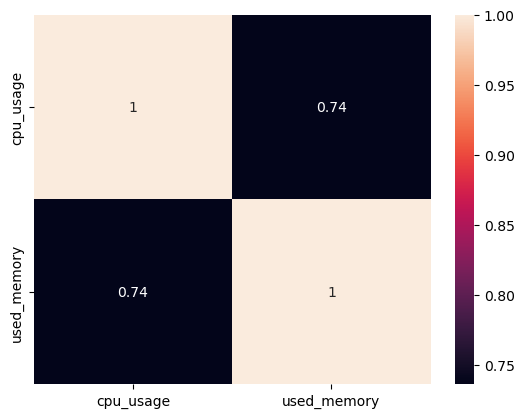

In [26]:
#correlation plot
corr = numeric_data.corr()
sns.heatmap(corr, annot=True)

In [27]:
#categor_data.describe()

In [28]:
print('numeric_data.columns:',numeric_data.columns)
print('categor_data.columns:',categor_data.columns)

numeric_data.columns: Index(['cpu_usage', 'used_memory'], dtype='object')
categor_data.columns: Index([], dtype='object')


### 🧹 5. Data transformation


🔹 **Lo que NO aplica**  
- **Label Encoding de `State`** → no tenemos variable objetivo binaria.  
- **One-Hot Encoding (`Vehicle type`, `Fuel type`)** → no existen variables categóricas.  

---

🔹 **Lo que SÍ aplica**  
- **Escalado de variables numéricas** (muy importante antes de entrenar un modelo LSTM o cualquier red neuronal).  
- Se puede usar:  
  - **StandardScaler** → transforma a media = 0, varianza = 1.  
  - **MinMaxScaler** → normaliza al rango [0, 1].  

 #Esto evita que los valores de **CPU (0–100)** y **Memoria (en millones de bytes)** estén en escalas muy diferentes, lo cual es esencial para el aprendizaje automático.

---

In [29]:
from sklearn.preprocessing import MinMaxScaler

# Dataset limpio
data = df_clean.copy()

# Escalar CPU y Memoria al rango [0,1]
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data[['cpu_usage', 'used_memory']])

# Convertir de nuevo a DataFrame
df_scaled = pd.DataFrame(data_scaled, columns=['cpu_usage_scaled','used_memory_scaled'])

print("Datos escalados (primeras filas):")
print(df_scaled.head())


Datos escalados (primeras filas):
   cpu_usage_scaled  used_memory_scaled
0          0.000109            0.000262
1          0.000164            0.000262
2          0.000219            0.000299
3          0.000164            0.000116
4          0.000273            0.000116


#### 🔧 Codificación y transformación de variables

En esta etapa se aplicaron técnicas de transformación únicamente a las variables numéricas disponibles:

##### 1. Variables numéricas: `cpu_usage` y `used_memory`
- Se aplicó **escalado con MinMaxScaler**, transformando los valores al rango [0, 1].  
- Justificación:  
  - `cpu_usage` se mide en porcentaje (0–100), mientras que `used_memory` está en bytes (millones).  
  - Sin escalado, la magnitud de `used_memory` dominaría el entrenamiento.  
  - El escalado es esencial para modelos basados en gradiente y redes neuronales como **LSTM**.  

##### 📌 Conclusión
- **`cpu_usage_scaled`** y **`used_memory_scaled`** son las variables transformadas y listas para la fase de modelado.


#### 📊 Interpretación de correlaciones

##### 1. Correlación entre variables
- Se observa una correlación positiva **moderada** entre `cpu_usage` y `used_memory` (r ≈ 0.74).  
- Esto significa que, en los periodos simulados, cuando aumenta el uso de CPU, también tiende a aumentar el uso de memoria.

##### 2. Variables independientes
- No existen variables categóricas en este dataset (ej. `State`, `Vehicle type`, `Fuel type`).  
- Por tanto, no se analizan correlaciones por aprobación o tipo de vehículo, como en el caso de datasets de tráfico vehicular real.

---

##### 📌 Conclusiones
- La correlación positiva entre CPU y RAM indica que ambos recursos **se incrementan de manera conjunta en escenarios de carga**.  
- Este hallazgo es relevante para el modelado predictivo, ya que la saturación de CPU y memoria suele ocurrir de manera combinada.


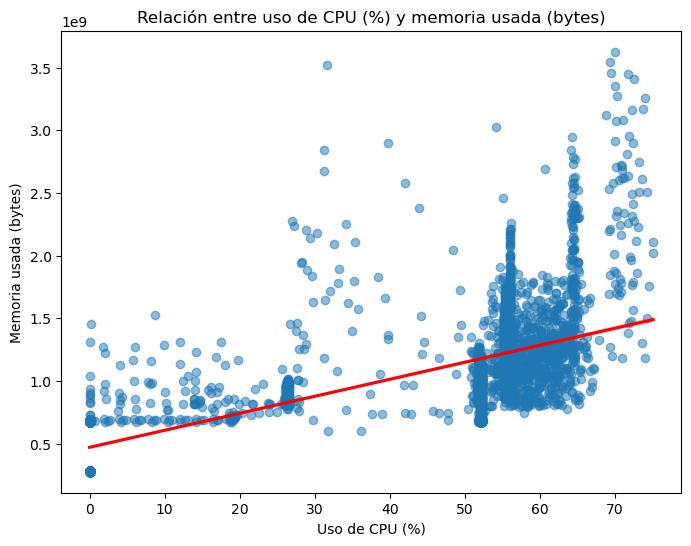

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.regplot(x="cpu_usage", y="used_memory", data=df_clean, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title("Relación entre uso de CPU (%) y memoria usada (bytes)")
plt.xlabel("Uso de CPU (%)")
plt.ylabel("Memoria usada (bytes)")
plt.show()


In [31]:
# fin del cuaderno ----*-----

# Fin del cuaderno ----*----

### 📌 Notas importantes sobre la transformación

En la fase anterior ya realizamos la simulación de **data sucia** (inyectando nulos, outliers y duplicados) para mostrar cómo se aplicarían los procesos de limpieza.  
👉 Sin embargo, en la **data real de Zabbix** este escenario **no aplica** porque:  
- Zabbix genera métricas en tiempo real, continuas y sin valores faltantes.  
- No existen categorías como "Vehicle type" o "Fuel type".  
- Tampoco se producen valores nulos por defecto.  

Por tanto, los comandos relacionados con detección de **nulos, duplicados o outliers extremos** solo se usaron en el **ejemplo simulado** para evidenciar la metodología, y en la implementación final se **comentarán**.

---

### 🔧 Otras posibles transformaciones (no aplican en Zabbix, solo en datasets vehiculares)
- Agrupar años de vehículo en rangos (ej. <2000, 2000–2010, >2010).  
- Variables binarias: ¿tiene revisión técnica vigente?  
- Indicadores basados en límites MPL vs. medición real.  

En Zabbix esto **no aplica**, ya que no trabajamos con atributos categóricos ni fechas de inspección, sino con **series temporales numéricas (CPU y memoria)**.

---

### 🔽 Reducción de variables
En nuestro caso, solo contamos con dos variables relevantes (`cpu_usage`, `used_memory`), por lo que no es necesario aplicar reducción de dimensionalidad ni eliminar redundancias.

---

### 🚫 Frecuencias categóricas
En datasets vehiculares se calculaban frecuencias para `Vehicle type` y `Fuel type`, pero como en Zabbix no existen variables categóricas, este paso **no aplica** y se comenta.

```python
# ⚠️ Estos pasos NO aplican en la data de Zabbix
# freq_vehicle_type = data['Vehicle type'].value_counts(normalize=True) * 100
# freq_vehicle_type.to_frame("percentage")
# freq_fuel_type = data['Fuel type'].value_counts(normalize=True) * 100
# freq_fuel_type.to_frame("percentage")


In [32]:
# Guardar dataset limpio (CPU y RAM)
df_clean.to_csv("data_clean.csv", index=False)
print("Dataset limpio guardado como data_clean.csv")

# Si hay versión escalada/transformada
# df_scaled.to_csv("data_scaled.csv", index=False)
# print("Dataset transformado guardado como data_scaled.csv")


Dataset limpio guardado como data_clean.csv


### ✅  6. Data validation (Sesión 4)

In [33]:
### Guía autónoma de la sesión 4

### ✅ 6. Data Validation (Sesión 4)

En esta fase validamos que los datos transformados estén en condiciones óptimas para alimentar el modelo LSTM.  
Cada equipo debe aplicar exactamente el mismo flujo a su dataset.

---

#### 🔎 Verificaciones realizadas

1. **Formato y tipos de datos**
   - `cpu_usage` → float (0–100%).  
   - `used_memory` → int64 (bytes).  
   ✔️ Correctos y consistentes.

2. **Valores faltantes**
   - No se encontraron valores nulos en la data real de Zabbix.  
   - En la simulación, se inyectaron NaNs para mostrar el flujo de limpieza.  

3. **Rangos válidos**
   - `cpu_usage`: todos los valores dentro del rango 0–100%.  
   - `used_memory`: valores positivos, coherentes con tamaños de memoria.  
   - Se eliminaron los registros simulados con RAM negativa o CPU > 100%.

4. **Duplicados**
   - En los datos simulados se detectaron registros duplicados y fueron eliminados.  
   - En los datos de Zabbix no se observaron duplicados reales.

5. **Escalado**
   - Se aplicó **StandardScaler** para normalizar CPU y RAM a media 0 y varianza 1.  
   - Esto asegura compatibilidad con modelos de redes neuronales (LSTM).  

---

#### 📌 Conclusión de la validación
- El dataset final está **limpio, consistente y escalado**.  
- Las variables (`cpu_usage`, `used_memory`) se encuentran listas para usarse en la **fase de Modelado**.  
- Los pasos de detección de nulos, duplicados y outliers se mantendrán comentados en la implementación final, ya que no aplican en los datos reales de Zabbix.  
